# Exploratory Data Analysis
Erik Matovič a Simon Kokavec

## 0. Importovanie

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

## 1. Základný opis dát spolu s ich charakteristikami

### Zadanie  
Pre dosiahnutie plného počtu bodov uveďte  
 - počet záznamov,
 - počet atribútov,
 - ich typy,
 - pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
 
 ### Riešenie
 
 

In [2]:
# read labor and profiles dataset
df_labor = pd.read_csv('./data/labor.csv', sep='\t')
df_profiles = pd.read_csv('./data/profiles.csv', sep='\t')

In [3]:
df_labor.shape, df_profiles.shape

((10035, 18), (3064, 10))

 - labor.csv má 10035 riadkov/atributov a 18 stĺpcov/features  
 - profiles.csv má 3064 riadkov/atributov a 10 stĺpcov/features 

In [4]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035 entries, 0 to 10034
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10035 non-null  int64  
 1   hemoglobin    10005 non-null  float64
 2   leukocyty     10004 non-null  float64
 3   etytr         10005 non-null  float64
 4   weight        10035 non-null  float64
 5   trombocyty    10005 non-null  float64
 6   ast           10005 non-null  float64
 7   alp           10004 non-null  float64
 8   relationship  10035 non-null  object 
 9   name          10035 non-null  object 
 10  alt           10005 non-null  float64
 11  hbver         10005 non-null  float64
 12  smoker        10035 non-null  object 
 13  erytrocyty    10005 non-null  float64
 14  er-cv         10005 non-null  float64
 15  indicator     10035 non-null  float64
 16  ssn           10035 non-null  object 
 17  hematokrit    10005 non-null  float64
dtypes: float64(13), int64(1), 

 - labor.csv má 18 stĺpcov, prevažne sú numerického typu(int a float), niektoré sú typu object(str)  
 - zároveň je vidieť nesúmer medzi poćtom atribútov - 10035 je celkový poćet, avšak niektoré záznamy majú o 30 menej, t.j. 10005(stĺpce hematokrit, er-cv, erytrocyty, hbver, alt, ast, trombocyty, eryrt, hemoglobin) a niektoré(leukocyty a alp) majú 10004 -> nutnosť riešiť pri transformácií údajov
 - dáta nemajú null hodnoty, ale vzhľadom na rozdielny poćet medzi stĺpcami majú NaN hodnoty(viď tail() nižšie)

In [5]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3064 non-null   int64 
 1   name              3064 non-null   object
 2   sex               3064 non-null   object
 3   current_location  3064 non-null   object
 4   blood_group       3064 non-null   object
 5   residence         3064 non-null   object
 6   birthdate         3064 non-null   object
 7   race              3064 non-null   object
 8   ssn               3064 non-null   object
 9   address           3064 non-null   object
dtypes: int64(1), object(9)
memory usage: 239.5+ KB


 - profiles.csv má 10 stĺpcov, prevažne sú objektového typu(str), unnamed: 0 je celočíselného typu(integer) 
 - zároveň je vidieť, že všetky záznamy majú rovnaký poćet atribútov - 3064

In [6]:
df_labor.head()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,relationship,name,alt,hbver,smoker,erytrocyty,er-cv,indicator,ssn,hematokrit
0,0,6.77299,5.28153,4.79087,104.22450,7.22472,61.85014,80.77401,married,Kathryn Wagner,2.01576,9.04461,no,7.94417,61.31451,0.0,887-91-9698,5.40103
1,1,6.35217,5.45245,3.34754,65.03608,7.00407,66.90722,90.01585,widowed,Frank Becker,0.81519,9.09262,no,5.33302,58.00624,0.0,506-37-0250,7.68167
2,2,5.37162,7.36106,7.10989,63.61518,6.95232,65.33091,74.23784,married,Stephanie Lewis,0.79787,6.18215,no,6.38771,62.73102,1.0,331-52-1241,6.27422
3,3,4.60987,8.04010,4.97779,30.35294,6.63243,67.33708,34.67995,married,Luis Williams,0.83917,5.22920,no,5.05640,62.60592,1.0,407-22-7513,6.61263
4,4,5.97408,6.66899,5.58872,97.97181,6.18242,67.48751,89.31030,divoced,Donald Hall,1.20122,4.97805,yes,5.10205,59.32470,1.0,486-30-7935,6.23117


In [11]:
df_profiles.head()

,Unnamed: 0,name,sex,current_location,blood_group,residence,birthdate,race,ssn,address
0,0,Elizabeth Johnson,F,"(Decimal('-64.545933'), Decimal('5.817377'))",B-,"319 Bradley Tunnel Suite 246\nBoyerstad, GA 12067","10/30/1938, 00:00:00",White,518-82-6493,"09441 Joyce Route Suite 717\nWest Megan, GA 12969"
1,1,Scott Holmes,M,"(Decimal('-18.8183775'), Decimal('94.375497'))",A-,"28739 Hoffman Valleys Apt. 636\nMichaelville, ...",1927-06-20,Black,015-03-8632,USNS Miller\nFPO AE 08377
2,2,William Roth,M,"(Decimal('35.903361'), Decimal('-133.029344'))",B-,"8623 Jordan Canyon Suite 498\nJoshuastad, OH 3...",1965-10-02,Black,898-78-8500,"7747 Nicole Wells\nShannonside, MI 84296"
3,3,Kimberly Barnes,F,"(Decimal('55.2055095'), Decimal('-121.665483'))",B+,Unit 0522 Box 6156\nDPO AE 24368,1962-02-14,White,478-72-0155,"228 Colleen Extension\nLake Morgan, AL 34806"
4,4,Sarah Escobar,F,"(Decimal('49.512264'), Decimal('-121.259776'))",AB-,"30306 Molina Junction\nPort Edwardview, OK 72746",02 Oct 1936,Indian,683-31-6335,"08249 Gentry Fall\nLewisshire, NY 20037"


 - pozrieme sa na dáta cez head

In [13]:
df_labor.tail()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,relationship,name,alt,hbver,smoker,erytrocyty,er-cv,indicator,ssn,hematokrit
10030,10030,5.52171,7.37800,7.04815,83.93728,7.29506,74.91299,74.00027,single,Gary Parks,6.29230,9.31528,N,9.21009,40.17639,1.0,028-45-3066,6.95568
10031,10031,5.72390,8.34137,5.88201,78.01508,6.43991,62.61013,82.18824,divoced,Michael Haynes,0.57249,5.58052,Y,5.01783,22.59664,1.0,041-77-3799,6.69757
10032,10032,7.12205,5.31366,4.84312,78.80204,7.76331,78.71905,75.14270,married,Donald Porter,2.38935,8.82716,Y,7.88062,65.02538,0.0,227-65-3699,5.46733
10033,10033,5.39175,5.72726,4.45572,15.18502,5.97680,63.31698,70.90388,single,Cassandra Williams,1.50721,NaN,no,6.81522,64.56211,0.0,669-16-6262,6.82568
10034,10034,7.11616,6.86954,6.25132,53.84799,5.55897,63.52155,76.31498,married,Jessica Diaz,1.62680,7.17967,N,7.49288,70.23548,1.0,524-42-2099,7.11213


In [14]:
df_profiles.tail()

,Unnamed: 0,name,sex,current_location,blood_group,residence,birthdate,race,ssn,address
3059,3059,Mark Washington,M,"(Decimal('-29.355461'), Decimal('39.128253'))",AB+,Unit 8496 Box 2991\nDPO AP 60676,"02/06/1948, 00:00:00",Black,769-02-2637,"96780 Justin Knoll Suite 589\nJonesview, FL 29858"
3060,3060,Kevin Torres,M,"(Decimal('44.1155125'), Decimal('-61.909003'))",O+,Unit 6807 Box 8669\nDPO AP 84633,2004-08-16,white,377-66-0191,"03913 Wendy Prairie Suite 372\nWatsonberg, ND ..."
3061,3061,Sarah Hill,F,"(Decimal('50.745986'), Decimal('63.552771'))",B+,"419 Barrett Radial Apt. 974\nParkermouth, PA 6...","01/04/1993, 00:00:00",White,749-86-9765,"882 Shawn Springs Suite 743\nNorth Amanda, DC ..."
3062,3062,Pamela Tran,F,"(Decimal('34.925995'), Decimal('-144.163677'))",B-,"5877 Jessica Viaduct Apt. 409\nLake Kevin, WY ...",1923-01-19,black,300-60-6784,"56665 Jorge Manors Apt. 278\nMarcoview, AL 06505"
3063,3063,John Robertson,M,"(Decimal('-5.7541135'), Decimal('-147.114234'))",AB+,1990 Paul Tunnel Apt. 686\nNorth Andreachester...,1966/04/22,Black,408-26-3386,"2569 Christensen Rapids\nGarrettchester, NM 24512"


 - pozrieme sa odzadu na dáta

 - môžeme vidieť, že v oboch prípadoch stĺpec **Unnamed:0** slúži ako index/riadkovanie, tak to upravíme
 - profiles má rozdielny zápis pri birthday
 - ssn = social security number

In [8]:
df_profiles.describe()

,Unnamed: 0
count,3064.000000
mean,1531.500000
std,884.644938
min,0.000000
25%,765.750000
50%,1531.500000
75%,2297.250000
max,3063.000000


 - descibe na profiles je zbytočný, kedžde **Unnamed: 0** má byť indexovanie

In [9]:
df_labor.describe()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,alt,hbver,erytrocyty,er-cv,indicator,hematokrit
count,10035.00000,10005.000000,10004.000000,10005.000000,10035.000000,10005.000000,10005.000000,10004.000000,10005.000000,10005.000000,10005.000000,10005.000000,10035.000000,10005.000000
mean,5017.00000,6.416198,6.777737,5.990406,69.859131,6.437079,68.231703,71.309492,2.197095,6.864928,6.427883,50.593076,0.641455,6.417913
std,2896.99931,1.006319,1.645043,1.633699,34.627389,0.988548,8.291273,19.056185,3.726174,1.700452,1.701901,13.840494,0.479597,1.004907
min,0.00000,2.944150,0.217130,0.000000,-68.325310,2.999650,0.000000,0.000000,0.000000,1.495520,1.032780,0.000000,0.000000,2.713920
25%,2508.50000,5.735950,5.474353,4.823230,46.136205,5.764240,62.610470,62.698557,0.926420,5.422540,5.151340,41.482190,0.000000,5.735940
50%,5017.00000,6.428260,6.828010,5.823300,69.491810,6.443160,68.257620,77.772515,1.229920,6.752090,6.296280,50.508420,1.000000,6.425880
75%,7525.50000,7.095870,8.013475,7.103040,93.608480,7.097900,73.892760,84.970195,1.966430,8.115930,7.672460,59.893420,1.000000,7.085230
max,10034.00000,10.049840,12.580870,11.632230,191.261970,10.383570,100.000000,100.000000,100.000000,13.080820,12.155200,100.000000,1.000000,10.628720


In [50]:
df_labor.mode()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,relationship,name,alt,hbver,smoker,erytrocyty,er-cv,indicator,ssn,hematokrit
0,0,5.49908,5.15386,5.09355,-25.99875,5.55556,47.47899,3.93519,married,Lisa Johnson,0.80941,4.18238,no,4.39560,8.03320,1.0,025-80-8154,5.37203
1,1,5.94626,8.38053,NaN,1.90895,5.94844,47.48398,13.05501,NaN,William Smith,0.94810,4.30120,NaN,4.65822,16.59002,NaN,036-69-5479,5.77042
2,2,6.10271,NaN,NaN,5.31174,6.41337,51.16316,14.85714,NaN,NaN,0.95419,4.37407,NaN,7.46027,20.20161,NaN,055-40-9628,6.08485
3,3,6.36522,NaN,NaN,10.20883,6.57086,54.26873,16.21971,NaN,NaN,0.96373,4.37773,NaN,7.79935,25.30805,NaN,085-41-8095,6.92077
4,4,NaN,NaN,NaN,15.78444,6.66867,54.53670,16.94870,NaN,NaN,1.01803,4.44520,NaN,NaN,25.51180,NaN,090-58-2482,7.45304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,10030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10031,10031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10032,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10033,10033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_labor.hemoglobin.mode()

0    5.49908
1    5.94626
2    6.10271
3    6.36522
dtype: float64

In [49]:
stats.mode(a=df_labor.hemoglobin)

ModeResult(mode=array([5.49908]), count=array([3]))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'etytr'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'alp'}>],
       [<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'hbver'}>,
        <AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'indicator'}>,
        <AxesSubplot:title={'center':'hematokrit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

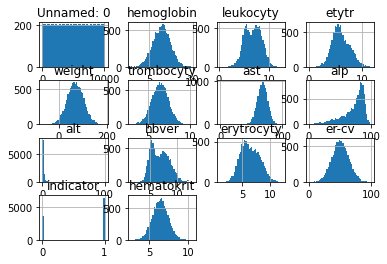

In [15]:
df_labor.hist(bins=50)

 - z uvedených histogramov sa nepotrebujeme bližśie pozrieť na **Unnamed: 0**, pretože to je riadkovanie, a aj na **Indicator**, ktorý ma hodnoty 0 až 1
 

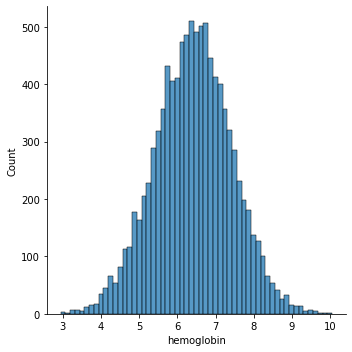

In [24]:
sns.displot(df_labor.hemoglobin)

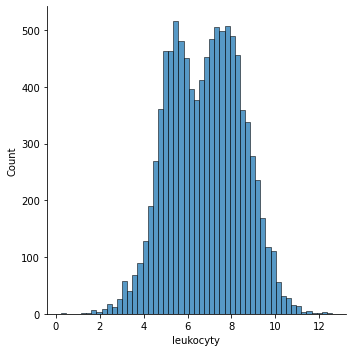

In [27]:
sns.displot(df_labor.leukocyty)

 - leukocyt je hlavným ukazovateľom pri leukémií -> dochádza počas leukémie k veľkému mnoźstvu bielych krviniek - leukecyty  
 - zaujímavá distribúcia - nie je Gaussova, bude asi potreba normalizovat? 

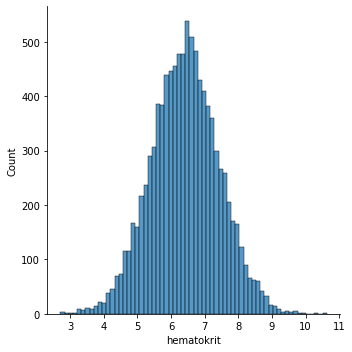

In [29]:
sns.displot(df_labor.hematokrit)

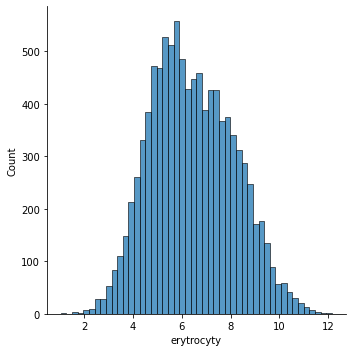

In [30]:
sns.displot(df_labor.erytrocyty)

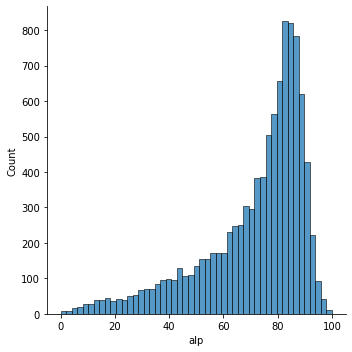

In [37]:
sns.displot(df_labor.alp)

 - alp vyzerá byť v percentách, zaujímavé je, že okolo 80% je najčastejší počet

## 2. Párová analýza dát 

### Zadanie

 - Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
 - Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.  
 
 ### Riešenie  
 
 

In [31]:
# erytrocyt + leukocyty

In [32]:
# leukocyt + hematokrit

In [33]:
# leukocyt + hemoglobin

In [36]:
# leukocyt vyššie => alt, alp a ast (enzýmy - hovoria o poškodení orgánov)

## 3. Formulácia a štatistické overenie hypotéz o dátach 

### Zadanie

 - Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.
 - Sformulované hypotézy overte vhodne zvoleným štatistickým testom.
 
 ### Riešenie  
 
 

In [35]:
# ak je vyssi leukocyt, tak je vyssia pravdepodobnost, tak alt, alp a ast budu asi vyssie

## 4. Identifikácia problémov v dátach s navrhnutým riešením  

### Zadanie

 - Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
 - Navrhnuté riešenie prvotne realizujte na dátach. Problém s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa potreby.
 
 ### Riešenie
 
 

 - nahradenie **Unnamed: 0** v oboch datasetoch za index